<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-Process,-Training,-and-Modeling" data-toc-modified-id="Pre-Process,-Training,-and-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-Process, Training, and Modeling</a></span><ul class="toc-item"><li><span><a href="#Pre-processing-of-well-log-analysis" data-toc-modified-id="Pre-processing-of-well-log-analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pre-processing of well log analysis</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li></ul></li></ul></li><li><span><a href="#Pycaret" data-toc-modified-id="Pycaret-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pycaret</a></span></li><li><span><a href="#Create-model" data-toc-modified-id="Create-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create model</a></span></li><li><span><a href="#Save/Load-Model" data-toc-modified-id="Save/Load-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save/Load Model</a></span></li><li><span><a href="#Deployment" data-toc-modified-id="Deployment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Deployment</a></span></li></ul></div>

# Pre-Process, Training, and Modeling

## Pre-processing of well log analysis

Using the notebook with the well log, I interpreted the well logs in an excel sheet (using Ko Ko Rules in petrophysical interpretation), looking at Gamma ray, resistance, and Density and Neutron Porosities. 

In [1]:
!pip install numpy

In [2]:
!pip install pyexcel-xlsx

In [3]:
!pip install xlrd==1.2.0

In [4]:
!pip install XlsxWriter

In [5]:
!pip install xlwings

In [6]:
!pip install xlwt

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
# Read file
path0 = r'C:\Users\yuvem\OneDrive\Documents\table_well_log.xlsx'
table = pd.read_excel(path0)
table.head()

,well_id,gamma_ray,resistivity,bulk_density,neutron_porosity,neutron_porosity_density_crossover,hydrocarbon_present,max_depth
0,0,left,right,left,left,yes,yes,649.0
1,1,left,left,right,left,yes,yes,585.0
2,2,left,right,left,left,yes,yes,483.0
3,3,left,right,left,left,yes,yes,581.0
4,4,left,right,left,left,yes,yes,581.0


In [94]:
df = table.set_index('well_id')

In [95]:
df.isnull().sum()

gamma_ray                             20
resistivity                           17
bulk_density                          20
neutron_porosity                      20
neutron_porosity_density_crossover    20
hydrocarbon_present                   20
max_depth                             19
dtype: int64

In [96]:
# Clear nulls
df = df.dropna()
print(df.isnull().sum())
print(len(df))

gamma_ray                             0
resistivity                           0
bulk_density                          0
neutron_porosity                      0
neutron_porosity_density_crossover    0
hydrocarbon_present                   0
max_depth                             0
dtype: int64
87


In [97]:
df.resistivity.unique()

array(['right', 'left'], dtype=object)

In [98]:
len(df)

87

### Classification

In [115]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import preprocessing, metrics, tree
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss, f1_score

In [116]:
# OneHot Encoding
# Get x and y; create a categorical boolean mask, then get_dummies
X = df.drop(['max_depth'], axis=1)
y = df[['max_depth']]

cats = X.dtypes==np.object
# turn into list
cat_cols = X.columns[cats].tolist()
cat_cols

['gamma_ray ',
 'resistivity',
 'bulk_density',
 'neutron_porosity',
 'neutron_porosity_density_crossover',
 'hydrocarbon_present']

In [117]:
# Get dummies
dummies = pd.get_dummies(X, columns=cat_cols, prefix_sep='_', drop_first=True)
dummies.shape

(87, 7)

In [118]:
dummies.head(20)

,gamma_ray _left,gamma_ray _right,resistivity_right,bulk_density_right,neutron_porosity_right,neutron_porosity_density_crossover_yes,hydrocarbon_present_yes
well_id,,,,,,,
0,1,0,1,0,0,1,1
1,1,0,0,1,0,1,1
2,1,0,1,0,0,1,1
3,1,0,1,0,0,1,1
4,1,0,1,0,0,1,1
5,1,0,1,0,0,1,1
7,1,0,1,1,1,0,0
8,1,0,1,1,0,0,0
9,1,0,1,0,0,1,1


In [120]:
X = dummies

In [121]:
y

,max_depth
well_id,
0,649.0
1,585.0
2,483.0
3,581.0
4,581.0
...,...
102,400.0
103,230.0
104,460.0


In [122]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(73, 7) (73, 1) (14, 7) (14, 1)


In [123]:
X_train

,gamma_ray _left,gamma_ray _right,resistivity_right,bulk_density_right,neutron_porosity_right,neutron_porosity_density_crossover_yes,hydrocarbon_present_yes
well_id,,,,,,,
103,1,0,1,0,1,1,1
76,1,0,0,0,0,1,0
38,1,0,1,0,0,1,1
98,1,0,0,0,0,1,0
65,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...
23,1,0,1,0,0,1,1
72,1,0,0,0,0,0,0
89,1,0,1,0,1,1,0


In [124]:
# Scale training and test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [135]:
X_train_scale

array([[ 0.27116307, -0.24077171,  0.52981294, -0.46547467,  1.23176352,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.24077171, -1.88745861, -0.46547467, -0.81184414,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467, -0.81184414,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.24077171, -1.88745861, -0.46547467, -0.81184414,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294,  2.14834462,  1.23176352,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467, -0.81184414,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467,  1.23176352,
        -2.25462488, -0.88345221],
       [ 0.27116307, -0.24077171, -1.88745861, -0.46547467,  1.23176352,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294,  2.14834462,  1.23176352,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.2407

In [136]:
X_test_scale

array([[ 0.27116307, -0.24077171, -1.88745861, -0.46547467, -0.81184414,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467, -0.81184414,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467, -0.81184414,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.24077171, -1.88745861, -0.46547467,  1.23176352,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467, -0.81184414,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.24077171, -1.88745861, -0.46547467, -0.81184414,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467,  1.23176352,
         0.44353276, -0.88345221],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467, -0.81184414,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.24077171,  0.52981294, -0.46547467, -0.81184414,
         0.44353276,  1.13192314],
       [ 0.27116307, -0.2407

In [126]:
# Create a list of models, with their performance scores

#models = []

#models.append(('KNN', KNeighborsClassifier()))
#models.append(('GNB', GaussianNB()))
#models.append(('RF', RandomForestClassifier()))
#models.append(('GB', GradientBoostingClassifier()))
#models.append(('XGB', XGBClassifier()))

In [127]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

### Linear regression

In [128]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred = lr.predict(X_test)

In [130]:
print("Depths where hydrocarbons are present =",y_pred)

Depths where hydrocarbons are present = [[457.66010475]
 [429.21660139]
 [429.21660139]
 [504.70527372]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [429.21660139]
 [429.21660139]
 [486.34691284]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [442.48135331]]


In [131]:
print('Const: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Const: 
 [402.6854918]
Coefficients: 
 [[ 59.21660139  -3.00731902 -56.78652718  38.4281663   47.04516897
   -4.24198843  28.34302382]]


In [132]:
# Get accuracy score
lr.score(X_train, y_train)*100

6.977866962634993

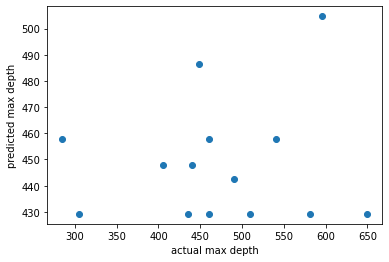

In [134]:
# Plot predictions against actual results
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel("actual max depth")
_ = plt.ylabel("predicted max depth")
plt.show()

### Random Forest 

In [156]:
rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)

In [157]:
# Train
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [158]:
# Get predictions
y_pred2 = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)
rfc_probs = y_pred_prob[:,1]
print("Depths where hydrocarbons are present =",y_pred)

Depths where hydrocarbons are present = [[457.66010475]
 [429.21660139]
 [429.21660139]
 [504.70527372]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [429.21660139]
 [429.21660139]
 [486.34691284]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [442.48135331]]


In [159]:
# Accuracy score
rfc.score(X_train, y_train)*100

28.767123287671232

### Decision Tree Classifier

In [142]:
# Decision Tree classifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [143]:
y_pred3 = dtc.predict(X_test)
print("Depths where hydrocarbons are present =",y_pred3)

Depths where hydrocarbons are present = [620. 410. 410. 450. 410. 620. 423. 410. 410. 243. 410. 620. 423. 369.]


In [144]:
#

In [148]:
dtc.score(X_train, y_train)*100

28.767123287671232

# Pycaret

In [149]:
!pip install pycaret

In [150]:
from pycaret.classification import *

In [152]:
s = setup(data = dummies, target = 'hydrocarbon_present_yes', normalize = True, train_size = 0.75)

,Description,Value
0,session_id,5715
1,Target,hydrocarbon_present_yes
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(87, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [153]:
# Compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9381,0.9556,0.9000,0.9750,0.9257,0.8725,0.8875,0.1040
gbc,Gradient Boosting Classifier,0.9381,0.8792,0.9000,0.9750,0.9257,0.8725,0.8875,0.0120
dt,Decision Tree Classifier,0.9214,0.9083,0.8667,0.9750,0.8957,0.8391,0.8615,0.0060
et,Extra Trees Classifier,0.9214,0.9417,0.8667,0.9750,0.8957,0.8391,0.8615,0.0990
lr,Logistic Regression,0.8952,0.9306,0.9000,0.9017,0.8874,0.7907,0.8109,0.3820
knn,K Neighbors Classifier,0.8952,0.9361,0.9000,0.9017,0.8874,0.7907,0.8109,0.2650
ridge,Ridge Classifier,0.8952,0.0000,0.9000,0.9017,0.8874,0.7907,0.8109,0.0120
ada,Ada Boost Classifier,0.8952,0.9028,0.9000,0.9017,0.8874,0.7907,0.8109,0.0170
lda,Linear Discriminant Analysis,0.8952,0.9028,0.9000,0.9017,0.8874,0.7907,0.8109,0.0080
svm,SVM - Linear Kernel,0.8310,0.0000,0.8000,0.7850,0.7779,0.6651,0.6859,0.0080


In [165]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5715, verbose=0,
                       warm_start=False)

In [164]:
pred_rf = predict_model(best_model, data=dummies)
pred_rf

,gamma_ray _left,gamma_ray _right,resistivity_right,bulk_density_right,neutron_porosity_right,neutron_porosity_density_crossover_yes,hydrocarbon_present_yes,Label,Score
well_id,,,,,,,,,
0,1,0,1,0,0,1,1,1,1.0000
1,1,0,0,1,0,1,1,1,0.6300
2,1,0,1,0,0,1,1,1,1.0000
3,1,0,1,0,0,1,1,1,1.0000
4,1,0,1,0,0,1,1,1,1.0000
...,...,...,...,...,...,...,...,...,...
102,1,0,1,0,1,1,1,0,0.8997
103,1,0,1,0,1,1,1,0,0.8997
104,1,0,1,0,0,1,1,1,1.0000


# Create model

In [175]:
# Create the model
rf = create_model('rf')

# Finalize trained model
finalize_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8333,0.6667,1.0000,0.8000,0.6957,0.7303
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8571,0.8333,0.6667,1.0000,0.8000,0.6957,0.7303
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5715, verbose=0,
                       warm_start=False)

# Save/Load Model

In [176]:
from sklearn import set_config

In [177]:
save_model(rf, model_name='rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hydrocarbon_present_yes',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=N...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         

In [178]:
rf_load = load_model('rf')
print(rf_load)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='hydrocarbon_present_yes',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=N...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
   

In [179]:
set_config(display='diagram')
rf_load[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='hydrocarbon_present_yes', time_features=[])

In [180]:
set_config(display='text')